### 1) 모듈 import

In [5]:
import warnings

warnings.filterwarnings(action='ignore')

In [6]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
from pykrx import stock
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from datetime import date
import plotly
import seaborn as sns

from mpl_finance import candlestick2_ohlc
import matplotlib.pyplot as plt

#matplotlib에서 x축과 y축에 표시되는 값을 ticker라 함
import matplotlib.ticker as ticker 
import matplotlib.dates as mdates

In [4]:
import mplfinance as mpf
import pandas_datareader as web

import pandas_datareader as pdr
from pandas_datareader import data, wb

In [6]:
df_before = fdr.DataReader('KS100','20180101','20191231')

### 2) 코스피 100 에 해당하는 종목들을 크롤링 (네이버증권)

In [16]:
for page in range(1, 10 + 1): # 500 = 50 * 10
    list = getSiseMarketSum(0, page) #0 코스피 1코스닥
    result += list
print(result)

import json
file = open("./kospi.json", "w+")
file.write(json.dumps(result))

<Response [200]>
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
<Response [200]>
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
<Response [200]>
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
<Response [200]>
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
<Response [200]>
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
err

95028

2

In [15]:

res = requests.get('https://finance.naver.com/sise/sise_market_sum.naver')
soup = BeautifulSoup(res.content,'html.parser')


section = soup.find('tbody')
items= section.find_all('tr', onmouseover="mouseOver(this)")

for item in items :
    basic_info = item.get_text()
    sinfo = basic_info.split("\n")
    print("\t" + sinfo[1] +"\t\t"+sinfo[2]+"\t\t\t"+sinfo[3])
    

	1		삼성전자			66,400
	2		LG에너지솔루션			426,500
	3		SK하이닉스			108,000
	4		삼성바이오로직스			831,000
	5		삼성전자우			59,800
	6		NAVER			266,000
	7		삼성SDI			588,000
	8		현대차			183,500
	9		LG화학			534,000
	10		카카오			81,800
	11		기아			82,600
	12		POSCO홀딩스			290,500
	13		KB금융			59,600
	14		삼성물산			116,500
	15		신한지주			42,350
	16		셀트리온			153,000
	17		현대모비스			202,500
	18		카카오뱅크			40,150
	19		SK이노베이션			205,000
	20		SK			236,500
	21		LG전자			102,500
	22		HMM			32,300
	23		한국전력			23,600
	24		하나금융지주			47,850
	25		카카오페이			102,000
	26		삼성생명			67,100
	27		두산에너빌리티			20,050
	28		크래프톤			257,000
	29		SK텔레콤			56,400
	30		S-Oil			105,500
	31		LG			75,400
	32		KT&G			84,900
	33		삼성에스디에스			147,000
	34		삼성전기			152,000
	35		LG생활건강			708,000
	36		우리금융지주			14,800
	37		고려아연			567,000
	38		포스코케미칼			133,500
	39		SK바이오사이언스			134,500
	40		현대중공업			113,000
	41		대한항공			28,500
	42		엔씨소프트			444,500
	43		KT			37,000
	44		삼성화재			198,500
	45		아모레퍼시픽			157,000
	46		하이브			219,500
	47		LG이노텍			379,500
	48		SK아이이테크놀로지			120,000
	49		기업은행			11,100
	50		

3

In [6]:
f = open("sc.csv", 'w')
f.write("시총순위,종목명,가격,최고점 대비 가격 비율\n")

mp=1

def fin(a):
    url='https://finance.naver.com/item/main.nhn?code='+str(a)
    
    res=requests.get(url)
    a=res.text

    tp=a.find("52주 최고")
    tm=a.find("52주 최고가")
    ta=a.find("52주 최고점")
    
    if tp==-1 or tm>-1 or ta>-1:
        global mp
        poe=a.find('52주최고')
        t=a[poe:poe+200]
        soup=BeautifulSoup(t,'html.parser')
        max52=int((soup.em.string).replace(',',''))
    
        poe=a.find('현재가')
        t=a[poe:poe+20].split(' ')
        ppt=t[1]
        pvalue=int(t[1].replace(',',''))

        poe=a.find('<dd>종목명')
        t=a[poe:poe+50].split(' ')
        y=t[1].split('</dd>')
        tt=y[0]

        print(tt+" : "+str(ppt)+"원 ("+str(int(pvalue/max52*100))+"%)")
        f.write(str(mp)+","+tt+","+str(pvalue)+","+str(int(pvalue/max52*100))+"\n")
        mp=mp+1
        
        if tp>-1 and tm==-1 and ta==-1:
            poe=a.find('최저 :' ) 
            t=a[poe:poe+400]
            soup=BeautifulSoup(t,'html.parser')
            max52=int((soup.em.string).replace(',',''))

            poe=a.find('현재가')
            t=a[poe:poe+20].split(' ')
            ppt=t[1]
            pvalue=int(t[1].replace(',',''))

            poe=a.find('<dd>종목명')
            t=a[poe:poe+50].split(' ')
            y=t[1].split('</dd>')
            tt=y[0]

        print(tt+" : "+str(ppt)+"원 ("+str(int(pvalue/max52*100))+"%)")
        f.write(str(mp)+","+tt+","+str(pvalue)+","+str(int(pvalue/max52*100))+"\n")
        mp=mp+1
        
ul="https://finance.naver.com/sise/sise_market_sum.nhn"
url="https://finance.naver.com/sise/sise_market_sum.nhn?&page="
#url="https://finance.naver.com/sise/sise_market_sum.nhn?&page=2"


res=requests.get(ul)
a=res.text

res=requests.get(url)
a=a+res.text

idx=0

while idx > -1 :
    idx=a.find('main.naver?code=',idx)
    if idx > -1 :

        idx += len('main.naver?code=')
        t=a[idx:idx+40]
        
        code=(t[0:6])

        fin(code)
        
f.close()

삼성전자 : 65,600원 (78%)
삼성전자 : 65,600원 (78%)
LG에너지솔루션 : 429,000원 (71%)
LG에너지솔루션 : 429,000원 (71%)
SK하이닉스 : 103,000원 (76%)
SK하이닉스 : 103,000원 (76%)
삼성전자우 : 59,300원 (78%)
삼성전자우 : 59,300원 (78%)
NAVER : 266,500원 (57%)
NAVER : 266,500원 (57%)
삼성SDI : 582,000원 (70%)
삼성SDI : 582,000원 (70%)
현대차 : 184,000원 (73%)
현대차 : 184,000원 (73%)
LG화학 : 534,000원 (58%)
LG화학 : 534,000원 (58%)
카카오 : 81,300원 (46%)
카카오 : 81,300원 (46%)
기아 : 82,200원 (87%)
기아 : 82,200원 (87%)
POSCO홀딩스 : 293,000원 (77%)
POSCO홀딩스 : 293,000원 (77%)
KB금융 : 59,100원 (89%)
KB금융 : 59,100원 (89%)
신한지주 : 42,200원 (97%)
신한지주 : 42,200원 (97%)
삼성물산 : 115,500원 (79%)
삼성물산 : 115,500원 (79%)
카카오뱅크 : 40,500원 (42%)
카카오뱅크 : 40,500원 (42%)
SK이노베이션 : 206,000원 (68%)
SK이노베이션 : 206,000원 (68%)
현대모비스 : 200,500원 (67%)
현대모비스 : 200,500원 (67%)
SK : 235,000원 (80%)
SK : 235,000원 (80%)
LG전자 : 102,000원 (59%)
LG전자 : 102,000원 (59%)
HMM : 32,400원 (63%)
HMM : 32,400원 (63%)
한국전력 : 23,750원 (86%)
한국전력 : 23,750원 (86%)
하나금융지주 : 48,150원 (91%)
하나금융지주 : 48,150원 (91%)
카카오페이 : 102,000원 (41%)
카카오

In [7]:
def return_value(address):
    res=requests.get(address)
    soup=BeautifulSoup(res.content, 'html.parser')
    items=soup.select('#contentarea > div.box_type_1 > table.type_2 > tbody > tr > td.num > strong#_nowVal.tah.p11')
    for items in items:
        try:
            if item['onmouseover'] == 'mouseOver(this)':
                rawno=item.select('td>a')[0]['href'].split('=')
                print(rawno[1] + '`t' + item.select('td')[0].text + '`t')
        except:
            continue
        
baseaddress="https://finance.naver.com/sise/sise_market_sum.naver?&page="


In [5]:
for i in range(1,35):
    return_value(baseaddress+str(i))


In [8]:
stockList = fdr.StockListing('KRX')

def crawling(page, kospi100):
    res = requests.get('https://finance.naver.com/sise/sise_market_sum.naver?&page='+str(page))
    soup = BeautifulSoup(res.content,'html.parser')
    
    #section = soup.select('tbody')
    #items= section.find_all('tr', onmouseover="mouseOver(this)")
    
    items = soup.select('tbody > tr > td:nth-of-type(2) > a')
    
    for item in range(len(items)):
        name=items[item].contents[0]
        if (stockList[stockList['Name']==name]['ListingDate']<'2018-1-1').tolist():
            code=items[item].attrs['href'][-6:]
            kospi100[code]=name
            
            if len(kospi100)==100:
                break
                
    return kospi100

def Kospi_100(): #kospi 상위 100개 출력 함수
    
    page = 1
    kospi100=dict()
    
    while(len(kospi100)!=100):  
        kospi100=crawling(page,kospi100)
        page=page+1
        
    return kospi100


In [9]:
kospi100 = Kospi_100()

kospi100

{'005930': '삼성전자',
 '373220': 'LG에너지솔루션',
 '000660': 'SK하이닉스',
 '207940': '삼성바이오로직스',
 '005935': '삼성전자우',
 '035420': 'NAVER',
 '006400': '삼성SDI',
 '005380': '현대차',
 '051910': 'LG화학',
 '035720': '카카오',
 '000270': '기아',
 '005490': 'POSCO홀딩스',
 '105560': 'KB금융',
 '055550': '신한지주',
 '068270': '셀트리온',
 '028260': '삼성물산',
 '323410': '카카오뱅크',
 '096770': 'SK이노베이션',
 '012330': '현대모비스',
 '034730': 'SK',
 '066570': 'LG전자',
 '011200': 'HMM',
 '015760': '한국전력',
 '086790': '하나금융지주',
 '032830': '삼성생명',
 '377300': '카카오페이',
 '034020': '두산에너빌리티',
 '017670': 'SK텔레콤',
 '010950': 'S-Oil',
 '259960': '크래프톤',
 '003550': 'LG',
 '033780': 'KT&G',
 '018260': '삼성에스디에스',
 '009150': '삼성전기',
 '051900': 'LG생활건강',
 '329180': '현대중공업',
 '010130': '고려아연',
 '316140': '우리금융지주',
 '302440': 'SK바이오사이언스',
 '003490': '대한항공',
 '003670': '포스코케미칼',
 '030200': 'KT',
 '036570': '엔씨소프트',
 '000810': '삼성화재',
 '090430': '아모레퍼시픽',
 '352820': '하이브',
 '011070': 'LG이노텍',
 '361610': 'SK아이이테크놀로지',
 '024110': '기업은행',
 '086280': '현대글로비스',
 '011

In [10]:
kospi_df = pd.DataFrame()

kospi_df['Code'] = kospi100.keys()
kospi_df['Name'] =kospi100.values()

kospi_df

,Code,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,005935,삼성전자우
...,...,...
95,111770,영원무역
96,069620,대웅제약
97,064350,현대로템
98,133690,TIGER 미국나스닥100


- kospi_df : 코스피 상위 100개 종목의 코드와 회사명을 저장한 dataframe type의 변수

- 결측치 제거

In [13]:
kospi_df = kospi_df.dropna()

kospi_df.head()

,Code,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,005935,삼성전자우


### 3) Trading 

- 특정 종목의 정보를 가져오는 함수 trading() 생성

In [15]:
def trading(code,start_date,end_date):
    df = fdr.DataReader(code,start_date, end_date)
    return df

- kospi_df 중에서 코로나 이전의 데이터들을 추출

In [16]:
#1) before corona

for i in range(len(kospi_df)):
    code = kospi_df['Code'][i]
    before_df = trading(code,'20180101','20191231')

###   * Strategy 
-  주가가 20일 이평선을 넘어가면 매수
- 주가 하락하는 시점에 바로 매도 (100주) 

- initial = 1억


In [147]:
#삼성

se_df = trading('005930','20180101','20191231') 

#### 데이터 전처리

- 1. 결측치 제거
- 2. 회귀분석
- 3. 상관분석..?

- 결측치 제거

In [148]:
se_df = se_df.dropna()

In [149]:
se_df.isnull().sum()

# ...? 

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64

In [150]:
se_df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


In [21]:
# plot 하기 위해

# 데이터의 type을 int로 바꿔줌
se_df[['Open','High','Low','Volume']] = se_df[['Open','High','Low','Volume']].astype(int) 


- 이상치(outlier) 확인

<AxesSubplot:xlabel='Date'>

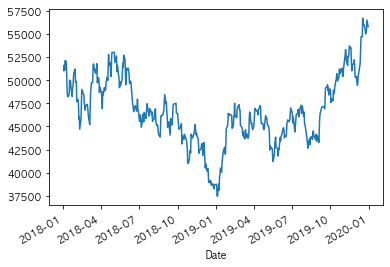

In [22]:
se_df['Close'].plot()

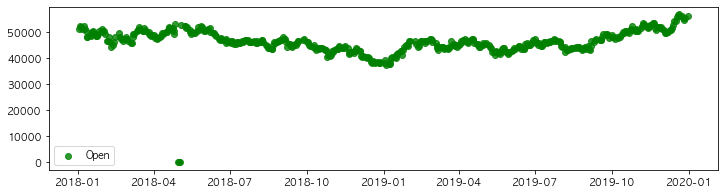

In [23]:
plt.figure(figsize=(12, 3))
plt.scatter(se_df.index, se_df['Open'],color='green',alpha=0.8,linewidth=1,label='Open')
plt.legend()
plt.show()

더 자세히 보면,

In [24]:
se_2018 = trading('005930','20180401','20180531')
se_2018 = se_2018.dropna()
se_2018['MA_20'] = se_2018['Close'].rolling(20).mean()
se_2018

,Open,High,Low,Close,Volume,Change,MA_20
Date,,,,,,,
2018-04-02,49000,49220,48500,48540,142313,-0.013816,NaN
2018-04-03,47880,48140,47280,48120,255365,-0.008653,NaN
2018-04-04,48160,48260,46920,46920,247684,-0.024938,NaN
2018-04-05,47400,49380,47340,48740,264912,0.038789,NaN
2018-04-06,48000,48580,47400,48400,250654,-0.006976,NaN
2018-04-09,48260,49440,48200,49200,199008,0.016529,NaN
2018-04-10,48540,49220,48040,48880,219687,-0.006504,NaN
2018-04-11,49900,49900,48600,48860,201022,-0.000409,NaN
2018-04-12,49440,49440,48880,49000,249325,0.002865,NaN


In [25]:
outlier = se_df[se_df.index == '2018-04-30'].index
se_df = se_df.drop(outlier,axis=0)

In [26]:
outlier = se_df[se_df.index == '2018-05-02'].index
se_df = se_df.drop(outlier,axis=0)

In [27]:
outlier = se_df[se_df.index == '2018-05-03'].index
se_df = se_df.drop(outlier,axis=0)

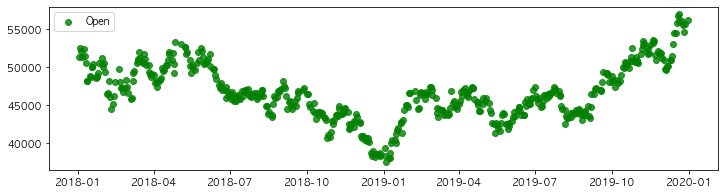

In [28]:
plt.figure(figsize=(12, 3))
plt.scatter(se_df.index, se_df['Open'],color='green',alpha=0.8,linewidth=1,label='Open')
plt.legend()
plt.show()

### => '2018-04-31' ~ '2018-05-03'  데이터에 문제가 있으므로 제거

In [29]:
type(se_df.index)

pandas.core.indexes.datetimes.DatetimeIndex


- **buy_signal이 0에서 1로 넘어가는 지점에서 매수**
- **sell_signal이 -1.0 이면 매도**

In [30]:
#se.resample('M').sum()

se_df['MA_20'] = se_df['Close'].rolling(20).mean()

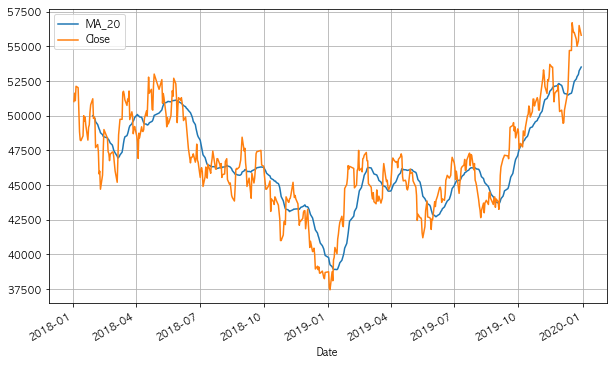

In [31]:
#이동평균값 plot 그리기
ma_plot = se_df[['MA_20','Close']].plot(figsize=(10,6))

ma_plot.plot()

ma_plot.legend(loc='best') #라벨 위치 설정

ma_plot.grid() #격자

In [45]:
se_df['buy_signal'] = np.where(se_df['MA_20'] > se_df['Close'], 1.0, 0.0)
#se_df['buy_signal'] = se_df['buy_signal'].diff()

In [46]:
se_df['sell_signal'] = 0.0

for i in range(1,len(se_df)):
    if se_df['Close'][i-1] > se_df['Close'][i]:
        se_df['sell_signal'][i] = -1.0
    else:
        se_df['sell_signal'][i] = 0.0

In [48]:
se_df.tail()

,Open,High,Low,Close,Volume,Change,MA_20,buy_signal,sell_signal
Date,,,,,,,,,
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,52652.5,0.0,-1.0
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,52812.5,0.0,-1.0
2019-12-26,54700,55400,54400,55400,9645034,0.007273,52972.5,0.0,0.0
2019-12-27,55700,56900,55500,56500,12313056,0.019856,53232.5,0.0,0.0
2019-12-30,56200,56600,55700,55800,8356767,-0.012389,53507.5,0.0,-1.0


In [ ]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")

sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

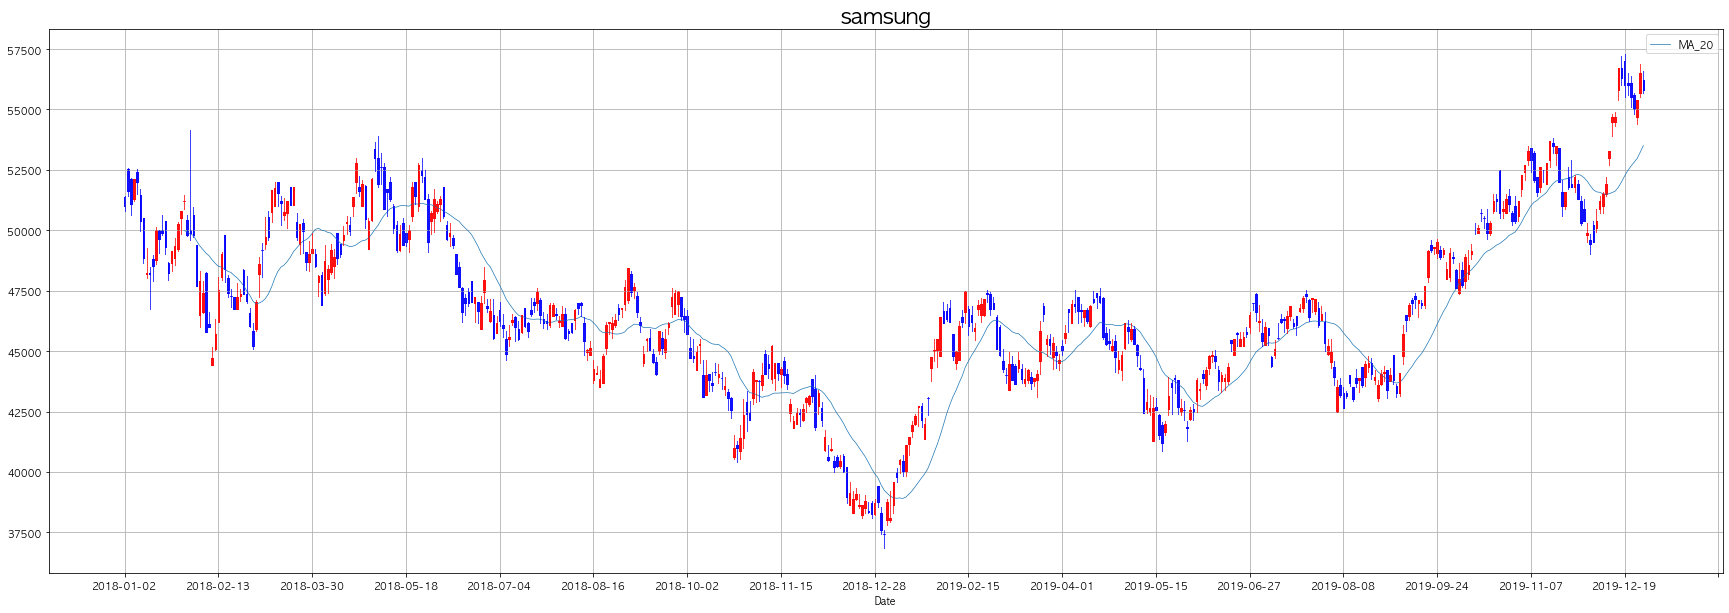

In [38]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
index = se_df.index.astype('str') # 캔들스틱 x축이 str로 들어감

# 이동평균선 그리기
ax.plot(index, se_df['MA_20'], label='MA_20', linewidth=0.7)

# X축 티커 숫자 20개로 제한
ax.xaxis.set_major_locator(ticker.MaxNLocator(20))

# 그래프 title과 축 이름 지정
ax.set_title('samsung', fontsize=22)
ax.set_xlabel('Date')

# 캔들차트 그리기
candlestick2_ohlc(ax, se_df['Open'], se_df['High'], 
                  se_df['Low'], se_df['Close'],
                  width=0.5, colorup='r', colordown='b')
ax.legend()
plt.grid()
plt.show()

### 매수 & 매도 시점
- positions
- 100주씩 거래

In [39]:
positions=pd.DataFrame()

positions['buy'] = 100*se_df['buy_signal']
positions['sell'] = 100*se_df['sell_signal']

In [82]:
positions = pd.concat([positions['buy'], positions['sell']],axis=1)

In [84]:
positions.head()

,buy,sell
Date,,
2018-01-02,NaN,0.0
2018-01-03,0.0,0.0
2018-01-04,0.0,-100.0
2018-01-05,0.0,0.0
2018-01-08,0.0,-100.0


In [102]:
pos_diff_s = (positions['sell'].diff())
pos_diff_b = (positions['buy'].diff())

In [105]:
pos_diff=pd.concat([pos_diff_s, pos_diff_b],axis=1)
pos_diff

,sell,buy
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.0,NaN
2018-01-04,-100.0,0.0
2018-01-05,100.0,0.0
2018-01-08,-100.0,0.0
...,...,...
2019-12-23,-100.0,0.0
2019-12-24,0.0,0.0
2019-12-26,100.0,0.0


#### 수익률
- portfolio 
    + holdings : 현재 보유하고 있는 주식의 가치
    + pos_diff : 매수 & 매도 물량
    + cash : 현재 보유 현금
    + total : 총 자산 
    + returns : 수익률
    

In [137]:
#초기 자본 : 1억

initial_capital=1e8

In [120]:
portfolio = positions.multiply(se_df['Close'],axis=0)
portfolio

,buy,sell
Date,,
2018-01-02,NaN,0.0
2018-01-03,0.0,0.0
2018-01-04,0.0,-5108000.0
2018-01-05,0.0,0.0
2018-01-08,0.0,-5202000.0
...,...,...
2019-12-23,0.0,-5550000.0
2019-12-24,0.0,-5500000.0
2019-12-26,0.0,0.0


In [121]:
portfolio['holdings_b']=(positions['buy'].multiply(se_df['Close'],axis=0))
portfolio['holdings_s']=(positions['sell'].multiply(se_df['Close'],axis=0))

In [123]:
portfolio['cash_s'] = initial_capital - (pos_diff_s.multiply(se_df['Close'],axis=0)).cumsum()
portfolio['cash_b'] = initial_capital - (pos_diff_b.multiply(se_df['Close'],axis=0)).cumsum()

In [124]:
portfolio['total_s'] = portfolio['cash_s'] + portfolio['holdings_s']
portfolio['total_b'] = portfolio['cash_b'] + portfolio['holdings_b']

In [126]:
portfolio['total'] = portfolio['total_s'] + portfolio['total_b']

portfolio['total']

Date
2018-01-02            NaN
2018-01-03            NaN
2018-01-04    200000000.0
2018-01-05    199896000.0
2018-01-08    199896000.0
                 ...     
2019-12-23    200335000.0
2019-12-24    200385000.0
2019-12-26    200345000.0
2019-12-27    200345000.0
2019-12-30    200345000.0
Name: total, Length: 487, dtype: float64

<AxesSubplot:xlabel='Date'>

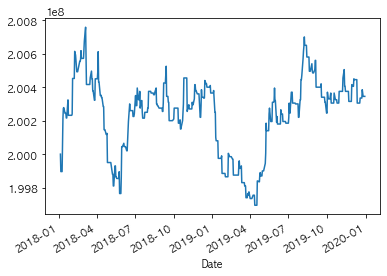

In [127]:
portfolio['total'].plot()

In [129]:
portfolio

,buy,sell,holdings_b,holdings_s,cash_s,cash_b,total_s,total_b,total
Date,,,,,,,,,
2018-01-02,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.0,0.0,0.0,0.0,100000000.0,NaN,100000000.0,NaN,NaN
2018-01-04,0.0,-5108000.0,0.0,-5108000.0,105108000.0,100000000.0,100000000.0,100000000.0,200000000.0
2018-01-05,0.0,0.0,0.0,0.0,99896000.0,100000000.0,99896000.0,100000000.0,199896000.0
2018-01-08,0.0,-5202000.0,0.0,-5202000.0,105098000.0,100000000.0,99896000.0,100000000.0,199896000.0
...,...,...,...,...,...,...,...,...,...
2019-12-23,0.0,-5550000.0,0.0,-5550000.0,106071000.0,99814000.0,100521000.0,99814000.0,200335000.0
2019-12-24,0.0,-5500000.0,0.0,-5500000.0,106071000.0,99814000.0,100571000.0,99814000.0,200385000.0
2019-12-26,0.0,0.0,0.0,0.0,100531000.0,99814000.0,100531000.0,99814000.0,200345000.0


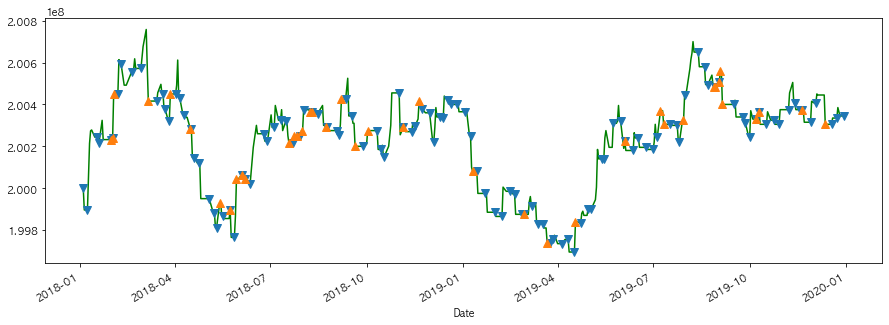

In [136]:
ax=portfolio['total'].plot(figsize=(15,5),color='g')

#매수 or 매도 해야하는 지점 표기하여 plot


#1)매도
ax.plot(portfolio.loc[pos_diff_s==-100].index,
       portfolio.total[pos_diff_s==-100],
       "v", markersize=8, label='Sell')

#2)매수
ax.plot(portfolio.loc[pos_diff_b==100].index,
       portfolio.total[pos_diff_b==100],
       "^",markersize=8, label='Buy')

In [138]:
portfolio['returns'] = portfolio['total'].pct_change()

In [143]:
portfolio['returns']=100*(portfolio['total']-initial_capital)/initial_capital

<AxesSubplot:xlabel='Date'>

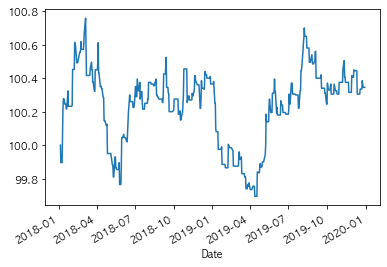

In [144]:
portfolio['returns'].plot()

In [146]:
portfolio['returns'][-1]

100.345

In [ ]:
#종목별 누적 수익률을 저장할 list
rst = []
rst.append(portfolio.iloc[-1:4].values) 

#tic 종목번호를 인덱스로 하여 종목번호와 수익률을 나타낸다
s=Series(rst,tic)
s.mean()

